In [2]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from pytorch_bpnn import BPNNModel

init MBPNN and loss function

In [3]:
model = BPNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 2e-1)

set loss and accuracy array of each epoch while traning and testing.

pupose: observe curve of learning

In [4]:
train_losses = []
train_acces = []
eval_losses = []
eval_acces = []

get normlised data from .csv file

In [5]:
data_labeld = np.loadtxt("norm_eigen_z_labeled.csv", delimiter=",", dtype=np.float32)

split data and label

In [6]:
data = data_labeld[:1, :7]
label = data_labeld[:1, 8:].astype(np.int64)

---
### Start train

In [52]:
train_loss = 0
train_acc = 0
model.train()

BPNNModel(
  (layer1): Sequential(
    (0): Linear(in_features=7, out_features=12, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=12, out_features=10, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=8, out_features=2, bias=True)
  )
)

---
demo of MBPNN

In [8]:
data = torch.from_numpy(data)
label = torch.from_numpy(label)

In [9]:
data = Variable(data)
label = Variable(label)

In [10]:
label = torch.flatten(label)

In [11]:
out = model(data)
# loss = criterion(out, label)

In [12]:
loss = criterion(out, label)

In [43]:
# 反向传播，记得要把上一次的梯度清0，反向传播，并且step更新相应的参数。
# backpropagation
optimizer.zero_grad()
loss.backward()
optimizer.step()

# 记录误差
# save loss into array
train_loss += loss.item()

# 计算分类的准确率
# cal accuracy
_, pred = out.max(1)
pred

tensor([1])

---
start training

In [7]:
for e in range(10000):
    train_loss = 0
    train_acc = 0
    model.train()   # 将模型改为训练模式
    train_data = data_labeld[:34, :7]
    train_label = data_labeld[:34, 8:].astype(np.int64)
    for i in range(34):
        train_data_s = torch.from_numpy(train_data[i]).reshape(1, 7)
        train_label_s = torch.from_numpy(train_label[i])
        train_label_s = torch.flatten(train_label_s)
        train_data_s = Variable(train_data_s)
        train_label_s = Variable(train_label_s)
        out = model(train_data_s)
        loss = criterion(out, train_label_s)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == train_label_s).sum().item()
        train_acc += num_correct
    train_losses.append(train_loss / 34)
    train_acces.append(train_acc / 34)

    eval_loss = 0
    eval_acc = 0
    model.eval()
    test_data = data_labeld[34:, :7]
    test_lable = data_labeld[34:, 8:].astype(np.int64)
    for j in range(16):
        test_data_s = torch.from_numpy(test_data[j]).reshape(1, 7)
        test_label_s = torch.from_numpy(test_lable[j])
        test_label_s = torch.flatten(test_label_s)
        test_data_s = Variable(test_data_s)
        test_label_s = Variable(test_label_s)
        out = model(test_data_s)
        loss = criterion(out, test_label_s)
        eval_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == test_label_s).sum().item()
        eval_acc += num_correct
    eval_losses.append(eval_loss / 16)
    eval_acces.append(eval_acc / 16)
    print("epoch: {}, train_loss: {}, train_acc: {}, eval_loss: {}, eval_acc: {}".format(e, train_loss / 34, train_acc / 34, eval_loss / 16, eval_acc / 16))


epoch: 0, train_loss: 0.7648252371479484, train_acc: 0.14705882352941177, eval_loss: 0.6941851750016212, eval_acc: 0.5
epoch: 1, train_loss: 0.7481187599546769, train_acc: 0.0, eval_loss: 0.6907575502991676, eval_acc: 0.4375
epoch: 2, train_loss: 0.7477192756007699, train_acc: 0.11764705882352941, eval_loss: 0.6872480548918247, eval_acc: 0.4375
epoch: 3, train_loss: 0.7475831140490139, train_acc: 0.2647058823529412, eval_loss: 0.6876711957156658, eval_acc: 0.4375
epoch: 4, train_loss: 0.7443710162359125, train_acc: 0.38235294117647056, eval_loss: 0.6808076146990061, eval_acc: 0.5
epoch: 5, train_loss: 0.7424301846938974, train_acc: 0.5588235294117647, eval_loss: 0.6672956310212612, eval_acc: 0.5
epoch: 6, train_loss: 0.7330650582033045, train_acc: 0.5294117647058824, eval_loss: 0.6580560309812427, eval_acc: 0.5625
epoch: 7, train_loss: 0.7242526368183249, train_acc: 0.5588235294117647, eval_loss: 0.6504576541483402, eval_acc: 0.6875
epoch: 8, train_loss: 0.7207417490289492, train_acc: 

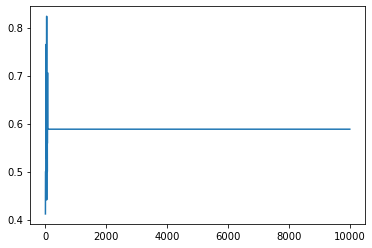

In [39]:
plt.plot(train_acces, label="train_loss")

---
start testing

In [10]:
model.eval()  # 将模型改为预测模式
test_data = data_labeld[34:, :7]
test_lable = data_labeld[34:, 8:].astype(np.int64)
predict_for_sum = []
for j in range(16):
    test_data_s = torch.from_numpy(test_data[j]).reshape(1, 7)
    test_label_s = torch.from_numpy(test_lable[j])
    test_label_s = torch.flatten(test_label_s)
    test_data_s = Variable(test_data_s)
    test_label_s = Variable(test_label_s)
    out = model(test_data_s)
    loss = criterion(out, test_label_s)
    eval_loss += loss.item()
    _, pred = out.max(1)
    predict_for_sum.append(pred.item())
    print(pred.item(), test_label_s.item(),pred.item() == test_label_s.item())

0 0 True
0 1 False
0 0 True
0 1 False
0 0 True
0 1 False
0 0 True
1 1 True
0 0 True
0 1 False
0 0 True
0 1 False
0 0 True
1 1 True
0 0 True
0 1 False


---
cal evaluation according to different criteria

In [13]:
TP = 6
TN = 4
FP = 2
FN = 4

In [14]:
TP/(TP+FP)

0.75

In [26]:
TP = 0
TN = 0
FP = 0
FN = 0
eval_1 = []
for i in range(len(test_lable)):
    if(test_lable[i] == 1 and predict_for_sum[i] == test_lable[i]):
        TP += 1
    if(test_lable[i] == 0 and predict_for_sum[i] == test_lable[i]):
        TN += 1
    if(test_lable[i] == 1 and predict_for_sum[i] != test_lable[i]):
        FP += 1
    if(test_lable[i] == 0 and predict_for_sum[i] != test_lable[i]):
        FN += 1
print(TP, TN, FP, FN)
eval_1.extend([TP/(TP+FP), TP/(TP+FN), TN/(TN+FP), (TP+TN)/(TN+FN+TP+FP)])

2 8 6 0


In [62]:
eval_1

[0.25, 1.0, 0.5714285714285714, 0.625]

In [28]:
np.savetxt('eval_1.csv', eval_1, delimiter=',')

In [53]:
predict_1 = predict_for_sum.count(1)
predict_0 = predict_for_sum.count(0)
label_1 = test_lable.count(1)
label_0 = test_lable.count(0)
predict_confusion = []
predict_confusion.extend([predict_0, predict_1])
label_confusion = []
label_confusion.extend([label_0, label_1])

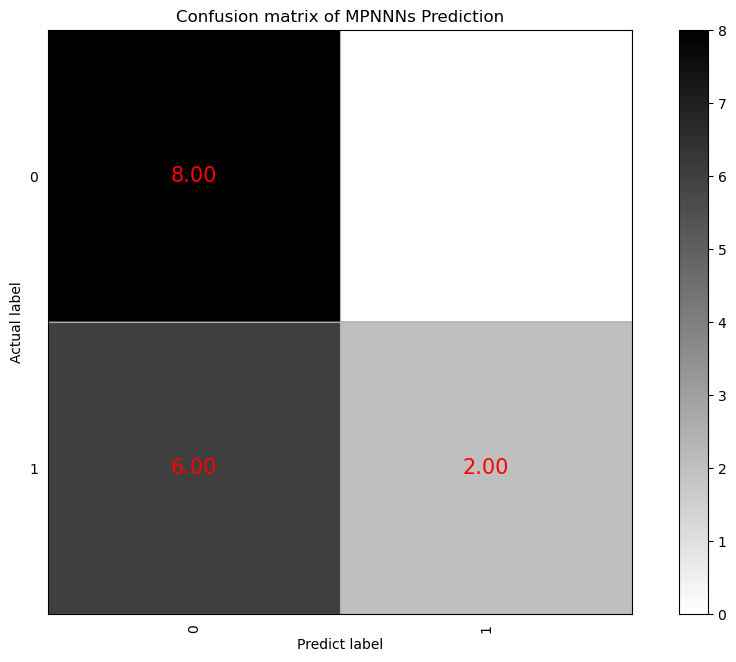

In [60]:
import confusion_matrix_demo as con
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_lable, predict_for_sum)
con.plot_confusion_matrix(cm, 'confusion_matrix_mbpnn.png',  classes=['0', '1'], title='Confusion matrix of MPNNNs Prediction')